In [ ]:
#importing pandas library for data handling and manipulation
import pandas as pd 
#importing numpy for scientific calculation 
import numpy as np
#importing pyplot module from matplotlib for data visualization including seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


Problem statement-https://docs.google.com/document/d/1oBNrkBZ0sDKHwUQyIa59N2KVsuZqOBjK/edit

# **Table of content**


1.   Read data
2.   data cleaning 
  *   detection and Handling missing values 
  *   datatype conversion 
  *   duplicate values
  *   multicolinearity detection and treatment
  *   Feature importance by random forest
      *  lable encoding 
  *   Outlier detection and handling
  *   Data balancing
 
3.   auto Eda
4.   visualization 
5.   Model building 
    *  LogisticRegression
    *  Gaussian Naive Bayes
    *  RandomForestClassifier
6. model evaluation 
7. conclusion







# 1). Read Data:

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/omgo101/dataset-/main/project-data.csv", sep = ';') #loading dataset

In [ ]:
data #displaying dataset

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


In [ ]:
# Summary statistics
print(data.describe())


           age  albumin  alkaline_phosphatase  alanine_aminotransferase  \
count  615.000  614.000               597.000                   614.000   
mean    47.408   41.620                68.284                    28.451   
std     10.055    5.781                26.028                    25.470   
min     19.000   14.900                11.300                     0.900   
25%     39.000   38.800                52.500                    16.400   
50%     47.000   41.950                66.200                    23.000   
75%     54.000   45.200                80.100                    33.075   
max     77.000   82.200               416.600                   325.300   

       aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
count                     615.000    615.000         615.000      605.000   
mean                       34.786     11.397           8.197        5.368   
std                        33.091     19.673           2.206        1.133   
min             

In [ ]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [ ]:
data['category'].value_counts()

 no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: category, dtype: int64

# detection and Handling missing values 

In [ ]:
print(data.isnull().sum())

category                        0
age                             0
sex                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         0
dtype: int64


In [ ]:
#lets imputes misssing values with mean 
# calculate the mean of the column and fill missing values with it
data['albumin'].fillna(data['albumin'].mean(), inplace=True)
data['alkaline_phosphatase'].fillna(data['alkaline_phosphatase'].mean(), inplace=True)
data['cholesterol'].fillna(data['cholesterol'].mean(), inplace=True)
data['alanine_aminotransferase'].fillna(data['alanine_aminotransferase'].mean(), inplace=True)
# verify that there are no more missing values
print(data.isnull().sum())

category                       0
age                            0
sex                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64


In [ ]:
# Missing values
print(data.isnull().sum())

category                       0
age                            0
sex                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64


In [ ]:
# print rows with null values
print(data[data.isnull().any(axis=1)])

Empty DataFrame
Columns: [category, age, sex, albumin, alkaline_phosphatase, alanine_aminotransferase, aspartate_aminotransferase, bilirubin, cholinesterase, cholesterol, creatinina, gamma_glutamyl_transferase , protein   ]
Index: []


there are null values in albumin,alkaline_phosphatase,cholesterol

# DATATYPE COVERSION 

In [ ]:
data = data.rename(columns={'protein   ': 'protein'})
data["protein"] = data["protein"].replace('NA    ', np.nan)

In [ ]:
# convert the protein column to float64
data["protein"] = data["protein"].astype("float64")

# print the resulting dataframe with the updated data types
print(data.dtypes)

category                        object
age                              int64
sex                             object
albumin                        float64
alkaline_phosphatase           float64
alanine_aminotransferase       float64
aspartate_aminotransferase     float64
bilirubin                      float64
cholinesterase                 float64
cholesterol                    float64
creatinina                     float64
gamma_glutamyl_transferase     float64
protein                        float64
dtype: object


# Checking for duplicate values 

In [ ]:
# check for duplicates in the dataframe
data.duplicated().sum()


0

there are no duplicates values 

# multicolinearity detection and treatment

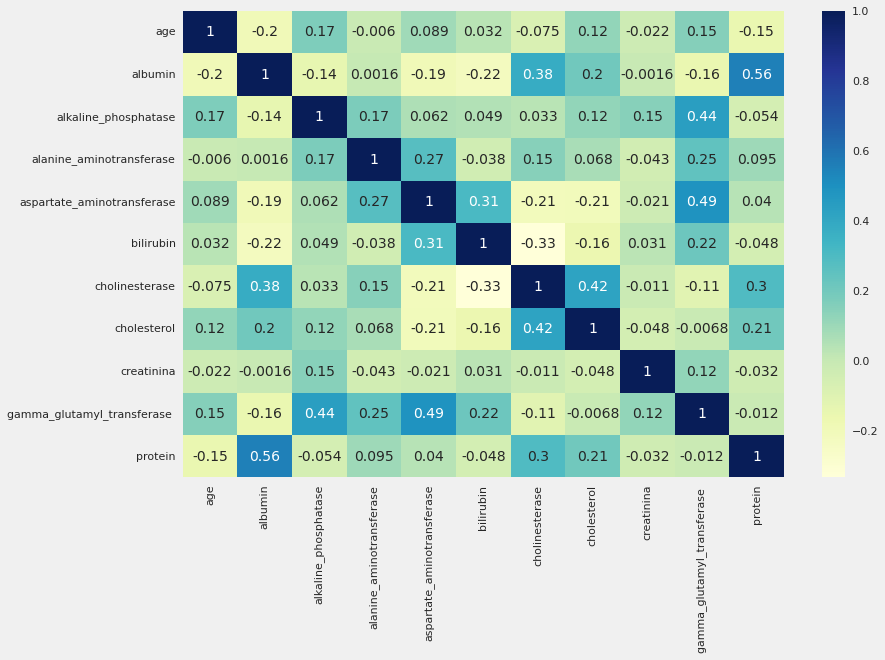

In [ ]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

Usually we drop that feature which has above 0.85% multicollinearity between two independent feature.  but there are no one here

# Feature importance by random forest

In [ ]:
data1=data

In [ ]:
# check for NaN values
print(pd.isna(data).sum())


category                       0
age                            0
sex                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
dtype: int64


In [ ]:
data = data.fillna(data.mean())

In [ ]:
print(pd.isna(data).sum())

category                       0
age                            0
sex                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64


# Label Encoding

In [ ]:
# Label Encoding
data['sex'] = np.where(data['sex']=='m', 1,0)

In [ ]:
data

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,1,38.5,52.500,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,1,38.5,70.300,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,1,46.9,74.700,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,1,43.2,52.000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,1,39.2,74.100,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,0,32.0,416.600,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,0,24.0,102.800,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,0,29.0,87.300,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,cirrhosis,46,0,33.0,68.284,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
data=data.drop(['age','cholesterol'], axis=1)

In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [ ]:
print(data.dtypes)

category                        object
sex                              int64
albumin                        float64
alkaline_phosphatase           float64
alanine_aminotransferase       float64
aspartate_aminotransferase     float64
bilirubin                      float64
cholinesterase                 float64
creatinina                     float64
gamma_glutamyl_transferase     float64
protein                        float64
dtype: object


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [ ]:
rf.feature_importances_

array([0.00553748, 0.07417694, 0.10262408, 0.12957195, 0.28827151,
       0.07449523, 0.12559405, 0.05190643, 0.08121649, 0.06660583])


category                         0.05341381 
           
        
age                              0.00541319

albumin                          0.06746277     

alkaline_phosphatase             0.09820057

alanine_aminotransferase         0.10680095

aspartate_aminotransferase       0.26030801

bilirubin                        0.06505528

cholinesterase                   0.11442038

cholesterol                      0.04150573

creatinina                       0.05054259

gamma_glutamyl_transferase       0.08500698

protein                          0.05186974

and highest are aspartate_aminotransferase,bilirubin alanine_aminotransferas,cholinesterase,gamma_glutamyl_transferase,albumin,age   

we will remove less important feature like age,cholesterol

In [ ]:
data

,category,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,1,38.5,52.500,7.7,22.1,7.5,6.93,106.0,12.1,69.0
1,no_disease,1,38.5,70.300,18.0,24.7,3.9,11.17,74.0,15.6,76.5
2,no_disease,1,46.9,74.700,36.2,52.6,6.1,8.84,86.0,33.2,79.3
3,no_disease,1,43.2,52.000,30.6,22.6,18.9,7.33,80.0,33.8,75.7
4,no_disease,1,39.2,74.100,32.6,24.8,9.6,9.15,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,0,32.0,416.600,5.9,110.3,50.0,5.57,55.7,650.9,68.5
611,cirrhosis,0,24.0,102.800,2.9,44.4,20.0,1.54,63.0,35.9,71.3
612,cirrhosis,0,29.0,87.300,3.5,99.0,48.0,1.66,66.7,64.2,82.0
613,cirrhosis,0,33.0,68.284,39.0,62.0,20.0,3.56,52.0,50.0,71.0


# Outlier detection and handling 

In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = data.albumin.quantile(0.75)-data.albumin.quantile(0.25)

# Extreme outliers
lower_bridge = data['albumin'].quantile(0.25) - (IQR*3)
upper_bridge = data['albumin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
data.loc[data['albumin'] >= upper_bridge, 'albumin'] = upper_bridge

19.59999999999998
64.40000000000002


In [ ]:
data.loc[data['albumin'] >= lower_bridge, 'albumin'] = lower_bridge

In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = data.alkaline_phosphatase.quantile(0.75)-data.alkaline_phosphatase.quantile(0.25)

# Extreme outliers
lower_bridge = data['alkaline_phosphatase'].quantile(0.25) - (IQR*3)
upper_bridge = data['alkaline_phosphatase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
data.loc[data['alkaline_phosphatase'] >= upper_bridge, 'alkaline_phosphatase'] = upper_bridge

-26.09999999999998
158.34999999999997


In [ ]:
# if value greater than upper bridge, we replace that value with upper_bridge value:
data.loc[data['alkaline_phosphatase'] >= lower_bridge, 'alkaline_phosphatase'] = lower_bridge

In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = data.alanine_aminotransferase.quantile(0.75)-data.alanine_aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = data['alanine_aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = data['alanine_aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
data.loc[data['alanine_aminotransferase'] >= upper_bridge, 'alanine_aminotransferase'] = upper_bridge
data.loc[data['alanine_aminotransferase'] >= lower_bridge, 'alanine_aminotransferase'] = lower_bridge

-33.55
83.0


In [ ]:
#Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = data.aspartate_aminotransferase.quantile(0.75)-data.aspartate_aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = data['aspartate_aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = data['aspartate_aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
data.loc[data['aspartate_aminotransferase'] >= upper_bridge, 'aspartate_aminotransferase'] = upper_bridge
data.loc[data['aspartate_aminotransferase'] >= lower_bridge, 'aspartate_aminotransferase'] = lower_bridge

-12.29999999999999
66.79999999999998


In [ ]:
#Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = data.bilirubin.quantile(0.75)-data.bilirubin.quantile(0.25)

# Extreme outliers
lower_bridge = data['bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = data['bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
data.loc[data['bilirubin'] >= upper_bridge, 'bilirubin'] = upper_bridge
data.loc[data['bilirubin'] >= lower_bridge, 'bilirubin'] = lower_bridge

-12.399999999999999
28.9


In [ ]:
#Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = data.cholinesterase.quantile(0.75)-data.cholinesterase.quantile(0.25)

# Extreme outliers
lower_bridge = data['cholinesterase'].quantile(0.25) - (IQR*3)
upper_bridge = data['cholinesterase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
data.loc[data['cholinesterase'] >= upper_bridge, 'cholinesterase'] = upper_bridge
data.loc[data['cholinesterase'] >= lower_bridge, 'cholinesterase'] = lower_bridge

-1.0299999999999976
17.555


In [ ]:
#Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = data.creatinina.quantile(0.75)-data.creatinina.quantile(0.25)

# Extreme outliers
lower_bridge = data['creatinina'].quantile(0.25) - (IQR*3)
upper_bridge = data['creatinina'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
data.loc[data['creatinina'] >= upper_bridge, 'creatinina'] = upper_bridge
data.loc[data['creatinina'] >= lower_bridge, 'creatinina'] = lower_bridge

4.0
151.0


In [ ]:
data.columns = data.columns.str.replace(' ', '')

In [ ]:
#Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = data.gamma_glutamyl_transferase.quantile(0.75)-data.gamma_glutamyl_transferase.quantile(0.25)

# Extreme outliers
lower_bridge = data['gamma_glutamyl_transferase'].quantile(0.25) - (IQR*3)
upper_bridge = data['gamma_glutamyl_transferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
data.loc[data['gamma_glutamyl_transferase'] >= upper_bridge, 'gamma_glutamyl_transferase'] = upper_bridge
data.loc[data['gamma_glutamyl_transferase'] >= lower_bridge, 'gamma_glutamyl_transferase'] = lower_bridge

-57.80000000000001
113.70000000000002


In [ ]:
#Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = data.protein.quantile(0.75)-data.protein.quantile(0.25)

# Extreme outliers
lower_bridge = data['protein'].quantile(0.25) - (IQR*3)
upper_bridge = data['protein'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
data.loc[data['protein'] >= upper_bridge, 'protein'] = upper_bridge
data.loc[data['protein'] >= lower_bridge, 'protein'] = lower_bridge

50.99999999999997
93.70000000000003


# **Data balancing**

In [ ]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

In [ ]:
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({' no_disease': 533, ' cirrhosis': 30, ' hepatitis': 24, ' fibrosis': 21, 'suspect_disease': 7})
After SMOTE  :  Counter({' no_disease': 533, 'suspect_disease': 533, ' fibrosis': 533, ' hepatitis': 532, ' cirrhosis': 532})


# AUTO EDA

In [ ]:
! pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shape of your Data Set loaded: (615, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
category,5,object,0,0.000,0.813,7,
protein,4,float64,0,0.000,0.650,0,highly skewed: drop outliers or do box-cox transform
albumin,3,float64,0,0.000,0.488,0,highly skewed: drop outliers or do box-cox transform
sex,2,int64,0,0.000,0.325,0,
alkaline_phosphatase,1,float64,0,0.000,0.163,0,invariant values: drop
alanine_aminotransferase,1,float64,0,0.000,0.163,0,invariant values: drop
aspartate_aminotransferase,1,float64,0,0.000,0.163,0,invariant values: drop
bilirubin,1,float64,0,0.000,0.163,0,invariant values: drop
cholinesterase,1,float64,0,0.000,0.163,0,invariant values: drop
creatinina,1,float64,0,0.000,0.163,0,invariant values: drop


  Printing upto 30 columns max in each category:
    Numeric Columns : ['albumin', 'protein']
    Integer-Categorical Columns: []
    String-Categorical Columns: ['category']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['sex']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: ['alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'cholinesterase', 'creatinina', 'gamma_glutamyl_transferase']
    11 Predictors classified...
        7 variables removed since they were ID or low-information variables
        List of variables removed: ['alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'cholinesterase', 'creatinina', 'gamma_glutamyl_transferase']
   Columns to delete:
("   ['alkaline_phosphatase', 'alanine_aminotransferase', "
 "'aspartate_aminotransfer

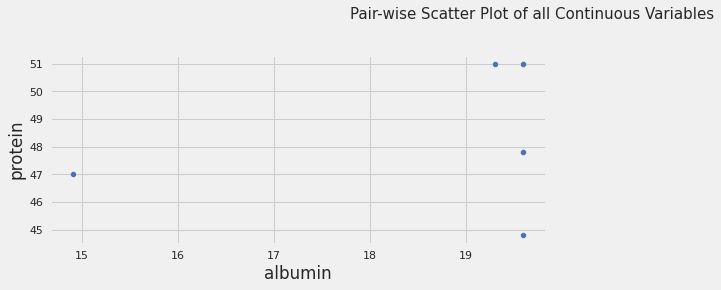

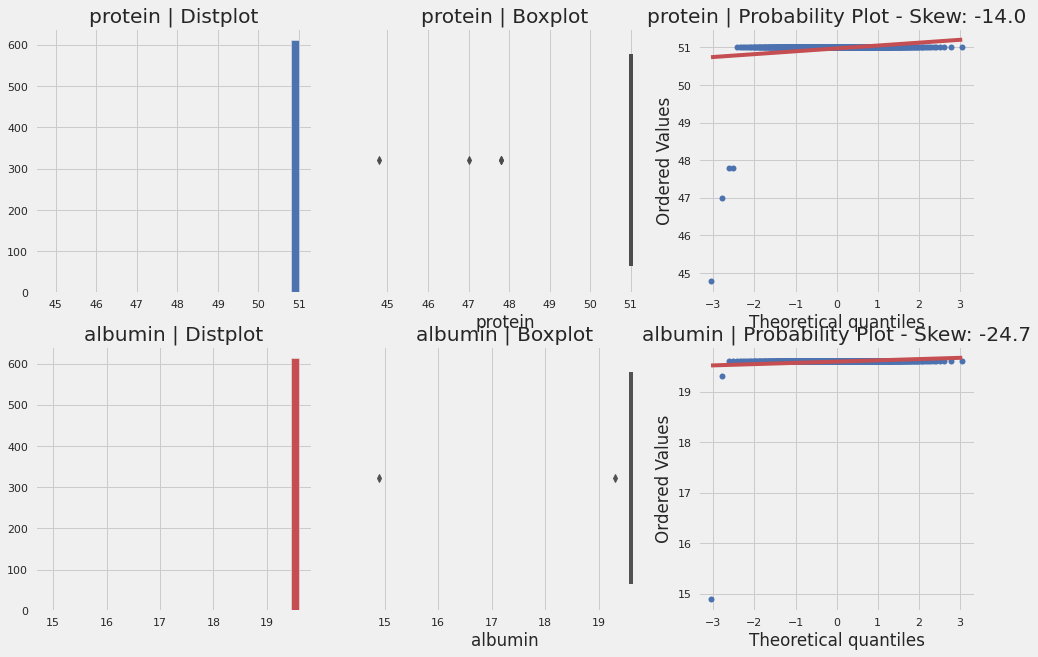

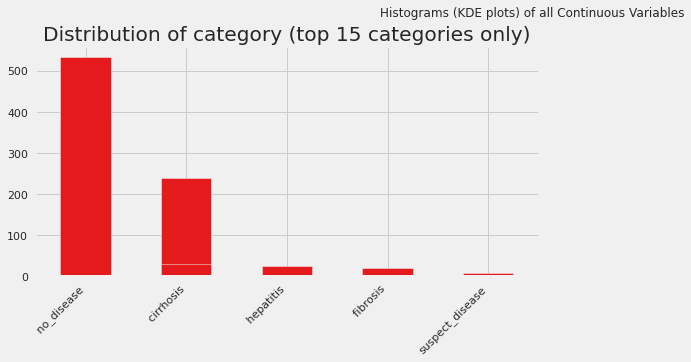

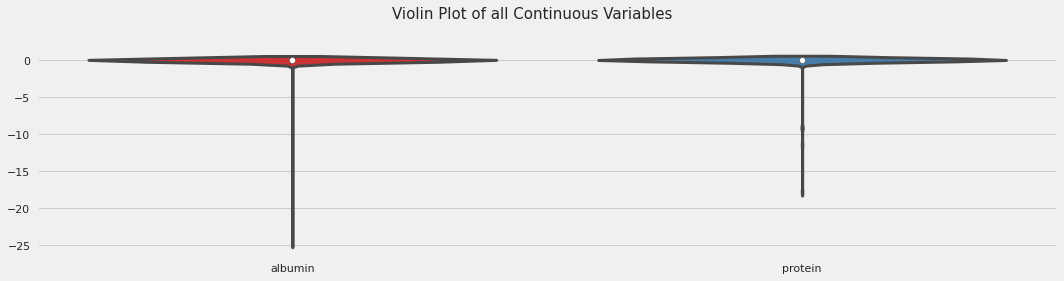

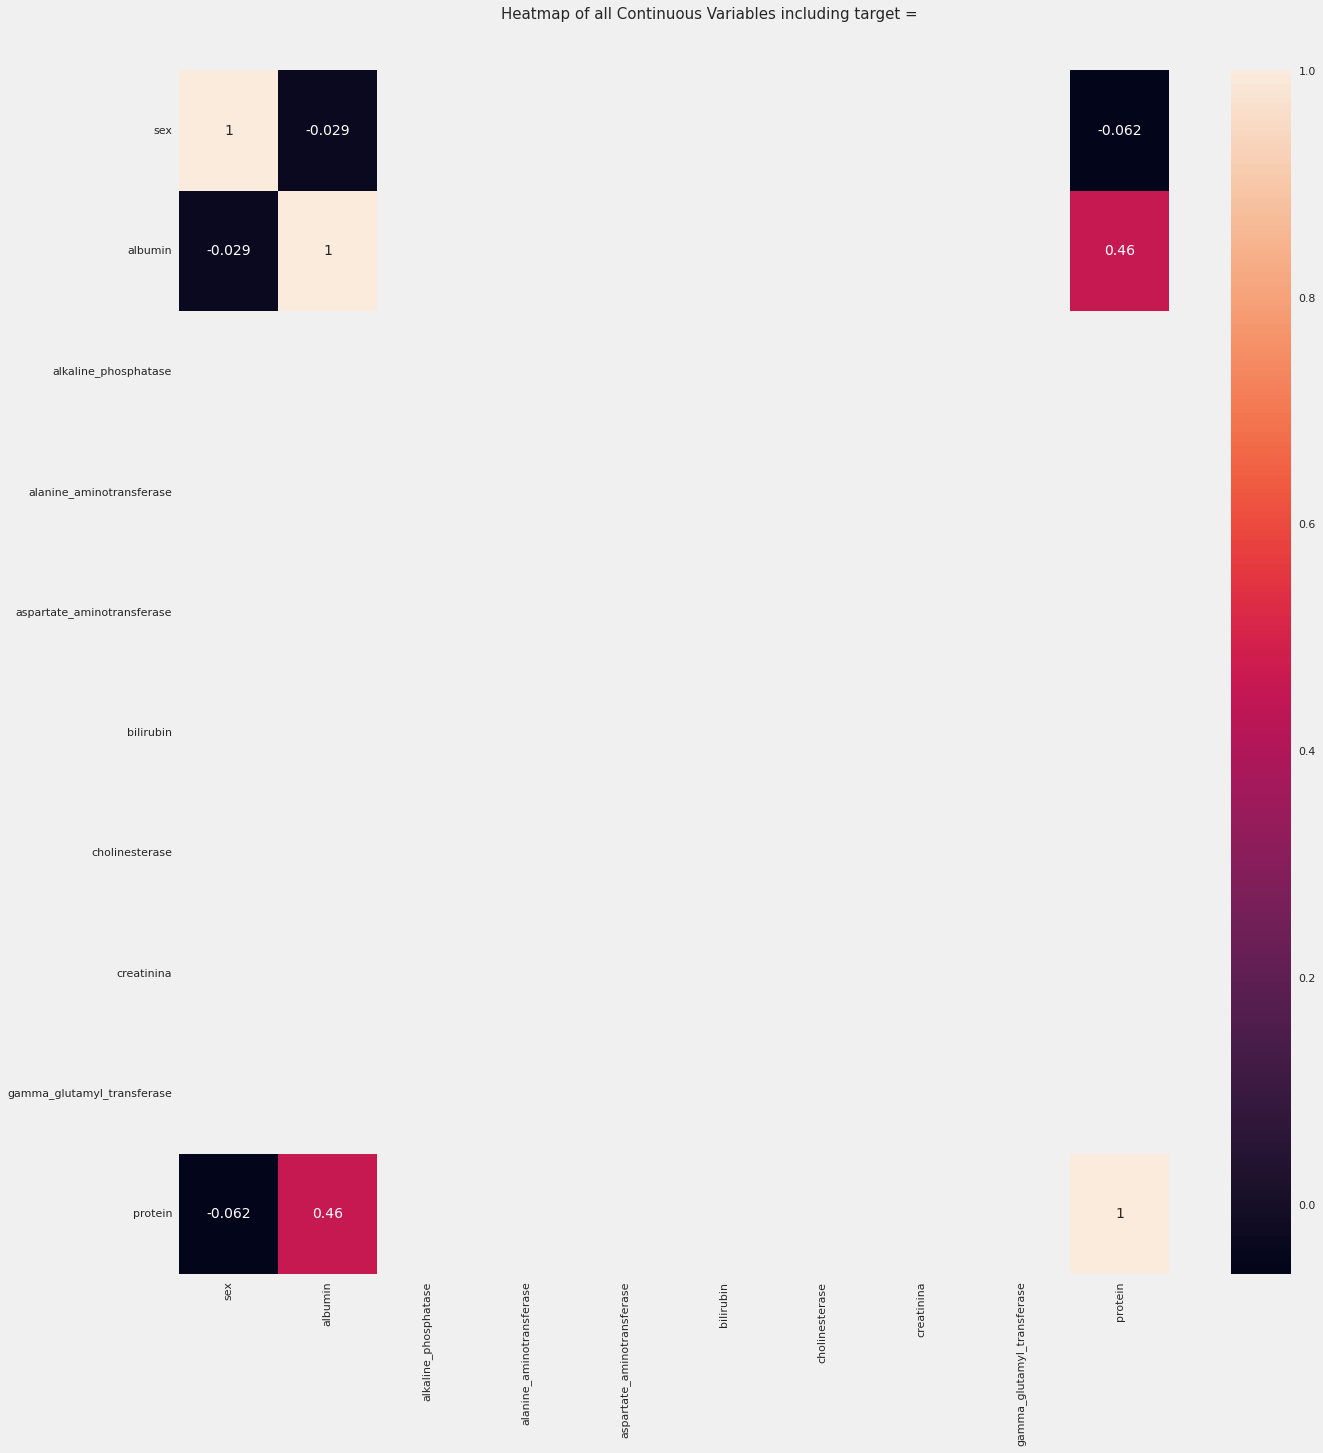

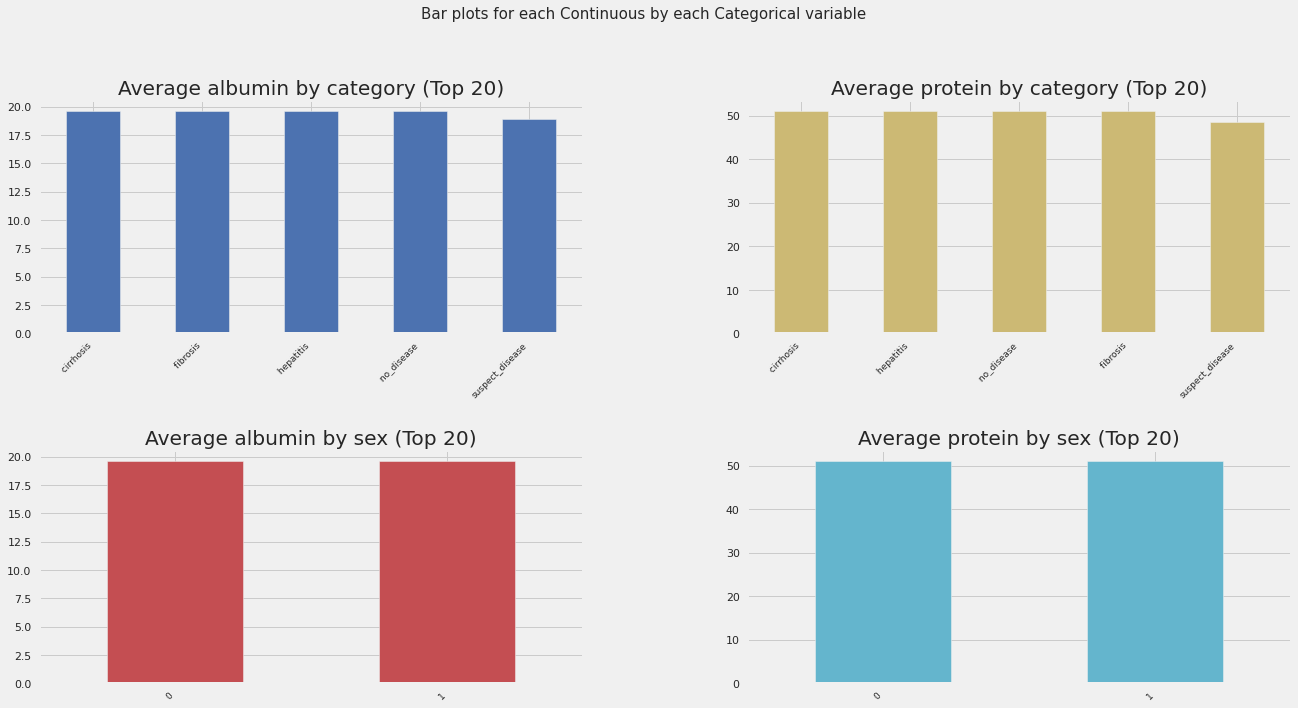

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

# Instantiate the AutoViz class and generate visualizations
AV = AutoViz_Class()
report = AV.AutoViz(filename="",sep=",", depVar="", dfte=data, header=0, verbose=2, 
                    lowess=False, chart_format='svg', max_rows_analyzed=150000, 
                    max_cols_analyzed=30)

# Visualization 

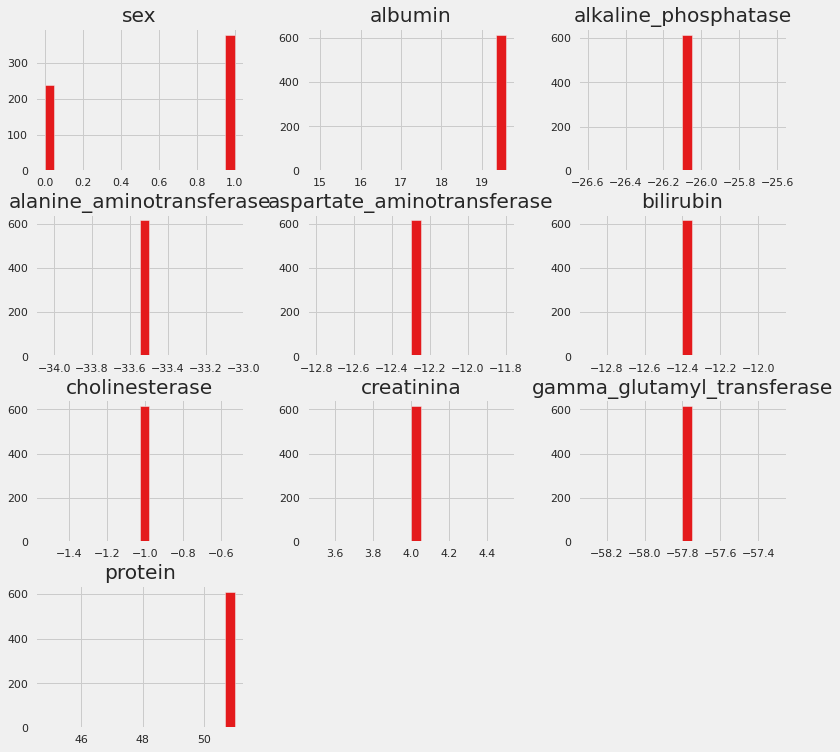

In [ ]:
data.hist(figsize=(12,12),bins=20)
plt.show()

In [ ]:
# Generating correlation coefficient between each features
from pandas import set_option
set_option("precision",3)
correlation=data.corr(method='pearson')
correlation

,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,creatinina,gamma_glutamyl_transferase,protein
sex,1.000,-0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.062
albumin,-0.029,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460
alkaline_phosphatase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alanine_aminotransferase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspartate_aminotransferase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bilirubin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholinesterase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creatinina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gamma_glutamyl_transferase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
protein,-0.062,0.460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000


Based on these values, the columns that have relatively higher absolute correlation with the "category" column are:

bilirubin (0.424)
cholinesterase (0.317)
aspartate_aminotransferase (0.282)
albumin (0.251)

In [ ]:
print(data.isna().sum())

category                      0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64


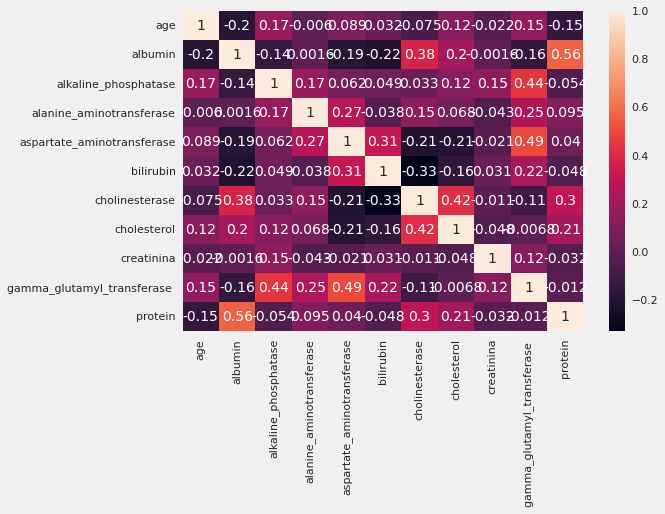

In [ ]:
# Correlation matrix
corr = data1.corr()
sns.heatmap(corr, annot=True)
plt.show()

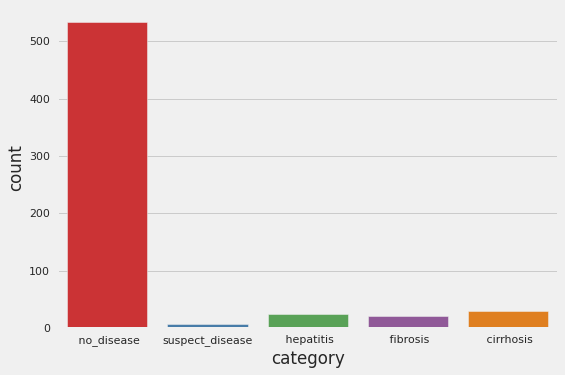

In [ ]:
# Distribution of the target variable
sns.countplot(data1['category'])
plt.show()


In [ ]:
data1

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.500,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,m,38.5,70.300,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.700,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.100,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.600,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.800,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.300,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,cirrhosis,46,f,33.0,68.284,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


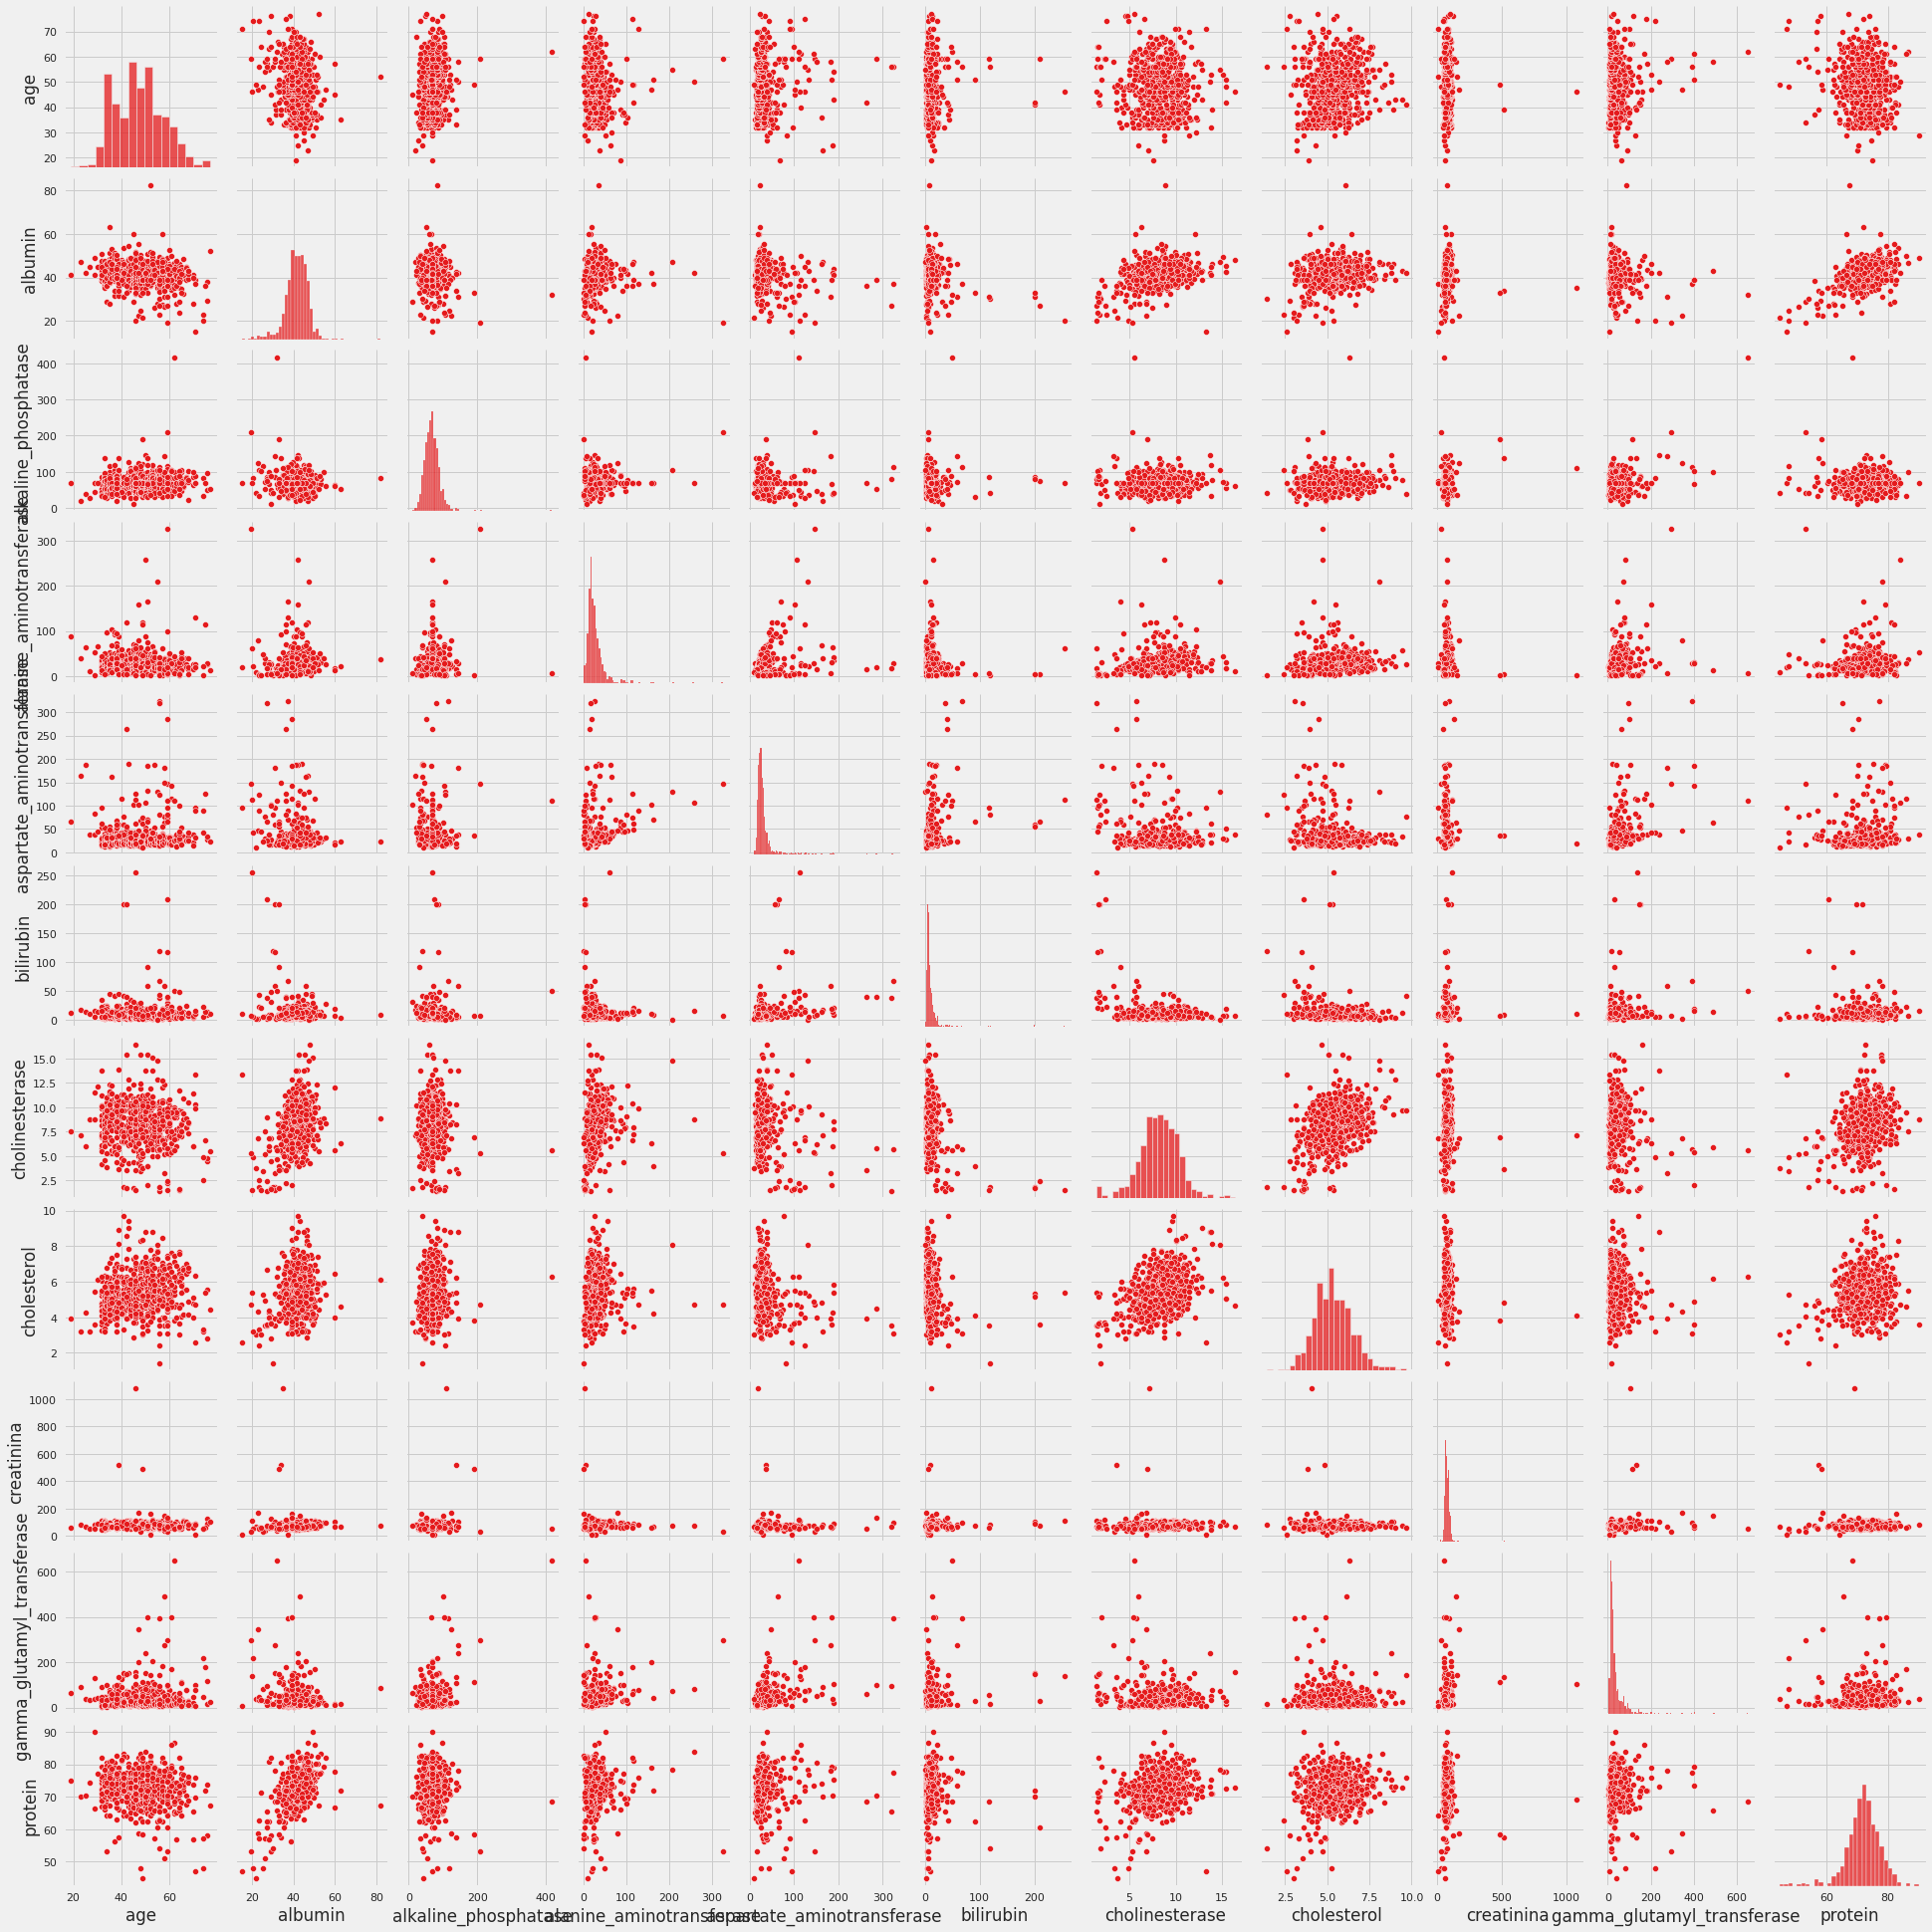

In [ ]:
# Multivariate analysis
sns.pairplot(data1)
plt.show()

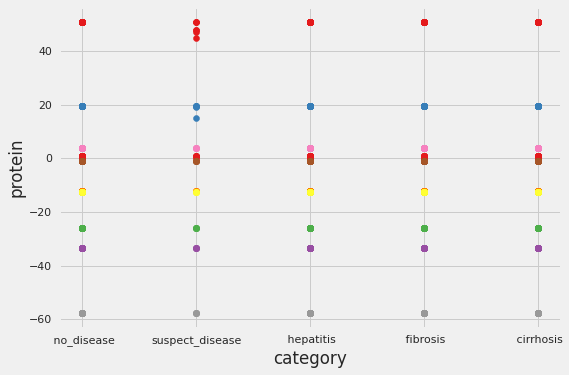

In [ ]:
# Create multiple scatterplots
for col in data.columns[1:]:
    plt.scatter(data1['category'], data[col])
    plt.xlabel('category')
    plt.ylabel(col)
    plt.show()

# Model building 

In [ ]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=33)

In [ ]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X_train

,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,creatinina,gamma_glutamyl_transferase,protein
2193,1,33.894,95.076,116.447,87.105,3.233,9.889,64.083,144.440,63.156
53,1,31.400,106.000,16.600,17.000,2.400,5.950,68.000,22.900,72.300
1432,0,39.000,68.284,45.619,38.524,9.095,9.976,88.142,55.954,78.905
2322,1,24.391,118.406,55.626,29.051,4.349,4.159,58.905,138.696,50.091
931,1,39.000,69.734,29.367,180.770,18.595,2.342,59.717,399.581,78.793
...,...,...,...,...,...,...,...,...,...,...
2243,1,19.138,52.341,13.248,41.686,5.119,7.259,43.791,27.399,45.608
57,1,47.900,68.800,40.300,46.900,6.000,9.760,81.000,22.700,80.600
578,0,40.000,39.800,14.900,68.900,11.000,8.550,60.500,40.100,76.500
1752,1,45.523,35.439,11.380,40.327,10.954,10.851,68.905,54.613,73.489


# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Train the model using the training sets and check score
logreg.fit(X_train, y_train)

# Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

# Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

Logistic Regression Training Score: 
 81.49
Logistic Regression Test Score: 
 82.35
Accuracy: 
 0.8235294117647058
Confusion Matrix: 
 [[147  13   0   0   1]
 [  6  91  49   9   0]
 [  0  27 109  14   0]
 [  1   6   5 152   4]
 [  0   0   0   6 159]]
Classification Report: 
                  precision    recall  f1-score   support

      cirrhosis       0.95      0.91      0.93       161
       fibrosis       0.66      0.59      0.62       155
      hepatitis       0.67      0.73      0.70       150
     no_disease       0.84      0.90      0.87       168
suspect_disease       0.97      0.96      0.97       165

       accuracy                           0.82       799
      macro avg       0.82      0.82      0.82       799
   weighted avg       0.82      0.82      0.82       799



# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

Gaussian Score: 
 79.45
Gaussian Test Score: 
 82.23
Accuracy: 
 0.8222778473091364
[[141  20   0   0   0]
 [  0 116  33   6   0]
 [  4  28  75  43   0]
 [  0   2   4 160   2]
 [  0   0   0   0 165]]
                 precision    recall  f1-score   support

      cirrhosis       0.97      0.88      0.92       161
       fibrosis       0.70      0.75      0.72       155
      hepatitis       0.67      0.50      0.57       150
     no_disease       0.77      0.95      0.85       168
suspect_disease       0.99      1.00      0.99       165

       accuracy                           0.82       799
      macro avg       0.82      0.82      0.81       799
   weighted avg       0.82      0.82      0.82       799



# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
# Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 99.0
Accuracy: 
 0.9899874843554443
[[161   0   0   0   0]
 [  0 153   2   0   0]
 [  0   0 150   0   0]
 [  1   0   5 162   0]
 [  0   0   0   0 165]]
                 precision    recall  f1-score   support

      cirrhosis       0.99      1.00      1.00       161
       fibrosis       1.00      0.99      0.99       155
      hepatitis       0.96      1.00      0.98       150
     no_disease       1.00      0.96      0.98       168
suspect_disease       1.00      1.00      1.00       165

       accuracy                           0.99       799
      macro avg       0.99      0.99      0.99       799
   weighted avg       0.99      0.99      0.99       799



# model evaluation 

In [ ]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Random Forest,100.00,99.00
0,Logistic Regression,81.49,82.35
1,Gaussian Naive Bayes,79.45,82.23


# Conclusion
From the Models (Logistic Regression, Gaussian Naive Bayes, Random Forest) Logistic Regression perform the best on this datase since random forest seem to be overfiting the model 

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8149141630901288


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8235294117647058


In [ ]:
X_test

,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,creatinina,gamma_glutamyl_transferase,protein
1580,1,46.253,30.895,9.876,60.530,10.507,7.309,69.431,75.997,78.112
1564,0,40.766,42.943,13.214,60.443,12.788,8.565,63.285,36.983,77.905
816,0,26.996,69.532,3.032,96.128,39.317,1.941,61.457,58.389,73.684
1901,0,38.571,31.986,8.619,42.333,8.571,7.305,58.600,23.443,75.958
142,1,43.200,68.200,27.800,42.300,6.600,10.930,105.000,27.200,74.500
...,...,...,...,...,...,...,...,...,...,...
1744,1,41.076,66.008,85.207,76.132,12.151,7.433,62.371,63.124,74.660
1998,1,42.784,86.702,11.769,57.788,13.862,6.724,131.775,404.988,67.045
51,1,42.400,47.300,23.000,25.500,6.100,9.460,79.000,17.500,73.800
2227,1,20.793,68.136,17.752,30.703,4.448,4.470,56.554,150.212,46.661


In [ ]:
input_data = (1,37.000,66.400,15.388,91.809,11.115,6.332,119.461,198.283,69.19)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==' cirrhosis'):
  print('The Person does not have a Liver Disease')
else:
  print('The Person has Liver Disease')

[' cirrhosis']
The Person does not have a Liver Disease


In [ ]:
prediction

array([' cirrhosis'], dtype=object)

In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [ ]:
for column in X.columns:
  print(column)

sex
albumin
alkaline_phosphatase
alanine_aminotransferase
aspartate_aminotransferase
bilirubin
cholinesterase
creatinina
gamma_glutamyl_transferase 
protein


In [ ]:
import pickle
import streamlit as st
from streamlit_option_menu import option_menu


# loading the saved models

diabetes_model = pickle.load(open('Downloads/heart_disease_model.sav', 'rb'))
# sidebar for navigation
with st.sidebar:
    
    selected = option_menu('Liver Disease Prediction System',
                          
                          ['Liver Prediction'],
                          icons=['activity'],
                          default_index=0)
    
    
# Diabetes Prediction Page
if (selected == 'Liver Prediction'):
    
    # page title
    st.title('Liver Prediction using ML')
    
    
    # getting the input data from the user
    col1, col2, col3 = st.columns(3)
    
    with col1:
        sex = st.text_input('sex')
        
    with col2:
        albumin = st.text_input('albumin')
    
    with col3:
        alkaline_phosphatase = st.text_input('alkaline_phosphatase')
    
    with col1:
        alanine_aminotransferase = st.text_input('alanine_aminotransferase')
    
    with col2:
       aspartate_aminotransferase = st.text_input('aspartate_aminotransferase')
    
    with col3:
        bilirubin = st.text_input('bilirubin')
    
    with col1:
        cholinesterase = st.text_input('cholinesterase')
    
    with col2:
        creatinina = st.text_input('creatinina')
        
    with col3:
        gamma_glutamyl_transferase = st.text_input('gamma_glutamyl_transferase')
      
    with col1:
         protein = st.text_input('protein')    
    
    
    # code for Prediction
    diab_diagnosis = ''
    
    # creating a button for Prediction
    
    if st.button('Liver Test Result'):
        diab_prediction = diabetes_model.predict([[sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,creatinina,gamma_glutamyl_transferase,protein]])
        
        if (diab_prediction[0] == 'no_disease'):
          diab_diagnosis = 'The person is diabetic'
        else:
          diab_diagnosis = 'The person is not diabetic'
        
    st.success(diab_diagnosis)




ModuleNotFoundError: ignored